# Car Price Prediction
 Loading and Preprocessing 
Steps:
### 1. Loading the Dataset:
    * Read the CSV file into a Pandas DataFrame.
    * Display basic info and check for missing values.
### 2. Preprocessing:
    * Missing Values: Check for missing values using isnull().sum().
    * Duplicate Rows: Identify and remove duplicates (if any) to avoid bias in the model.
    * Removing Outliers: Outliers are detected using the IQR method and removed to improve model performance.
    * Skewness: Highly skewed features are transformed (e.g., using yeo-johnson).
    * Feature Selection: Highly correlated features are removed to prevent multicollinearity.
    * Feature Scaling: StandardScaler is used to scale features for algorithms sensitive to feature magnitudes.

### Importing necessary libraries

In [105]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")


### Loading Dataset

In [4]:
#Read data from csv
df = pd.read_csv('CarPrice_Assignment.csv')

### Exploring Dataset

In [6]:
# to show starting 5 rows in dataset
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# to show tail values
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [8]:
# To show information(column name,null values,datatype) about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# to show statistical information
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Identify and Handling missing values

In [11]:
# To show null values in dataframe
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Identify and Handling duplicates

In [13]:
# To show duplicated values
df.duplicated().sum()

0

In [14]:
#drop duplicates if any
df = df.drop_duplicates()

In [15]:
# to group numerical features
numerical_features = df.select_dtypes(include = ['int64','float64']).columns
print(numerical_features)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


<Axes: >

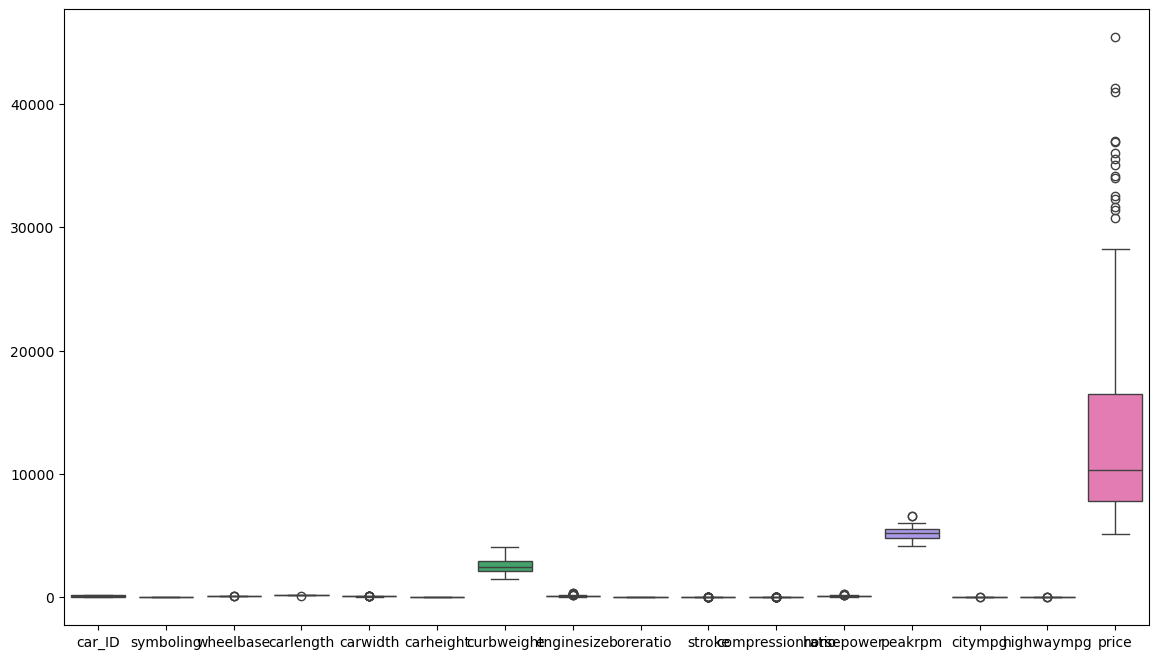

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(df)

### Finding and Handling outliers

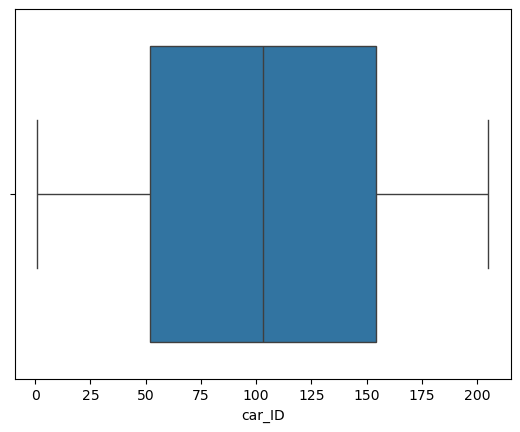

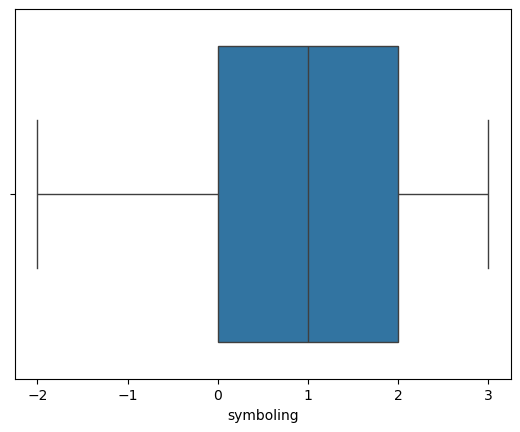

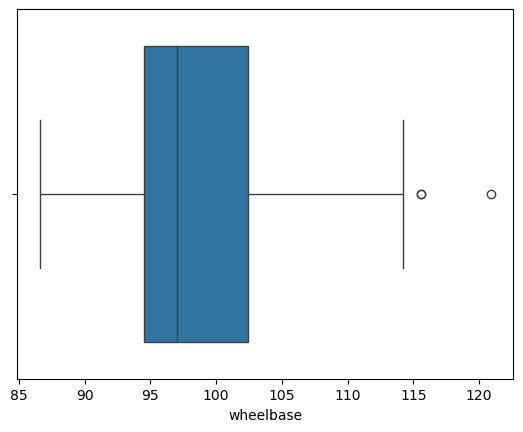

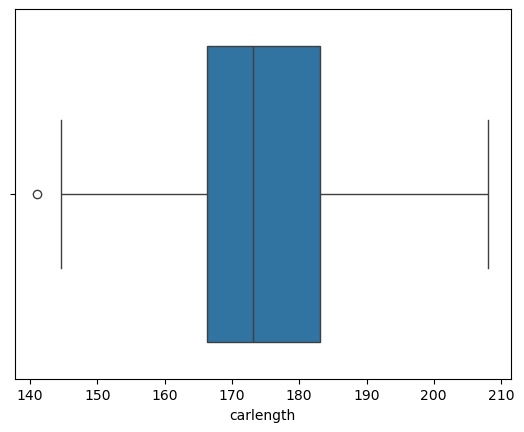

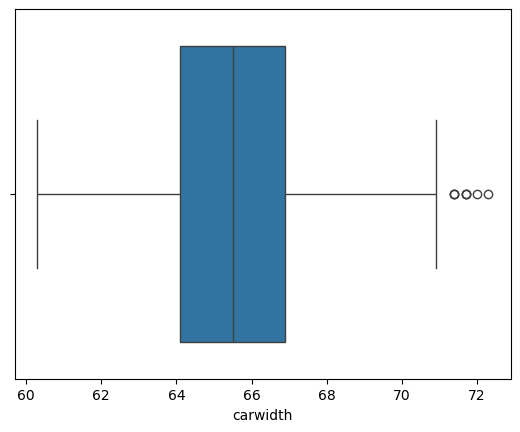

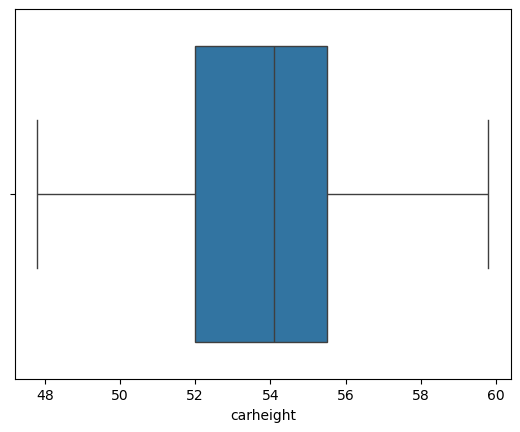

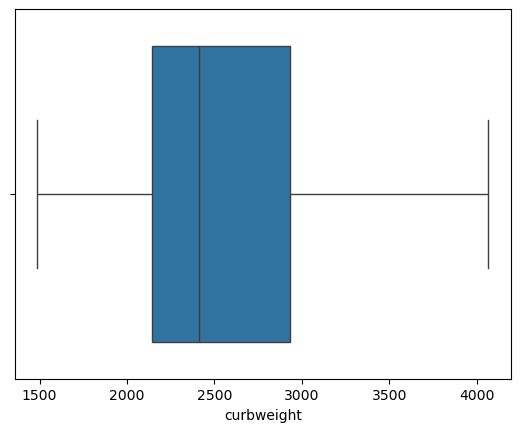

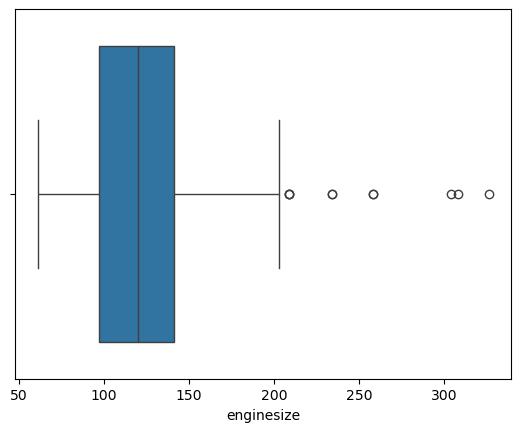

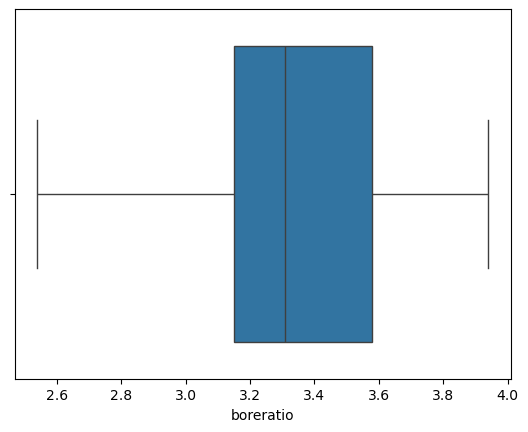

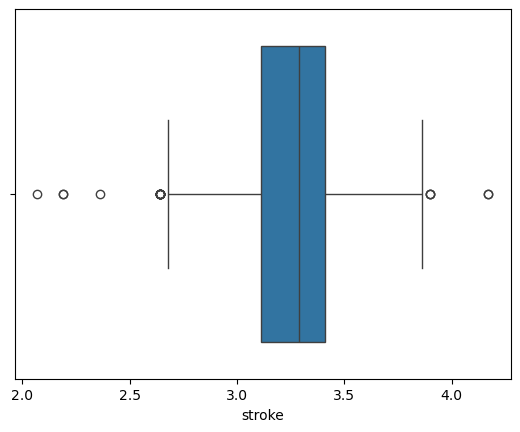

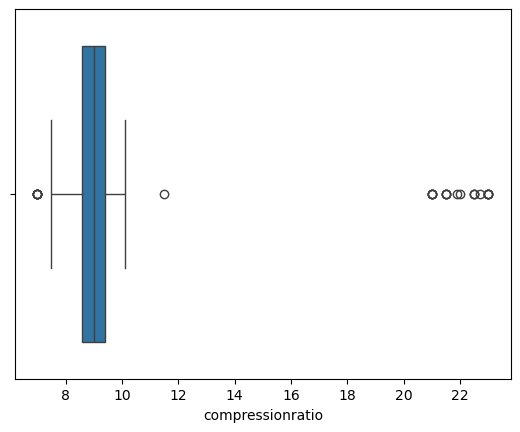

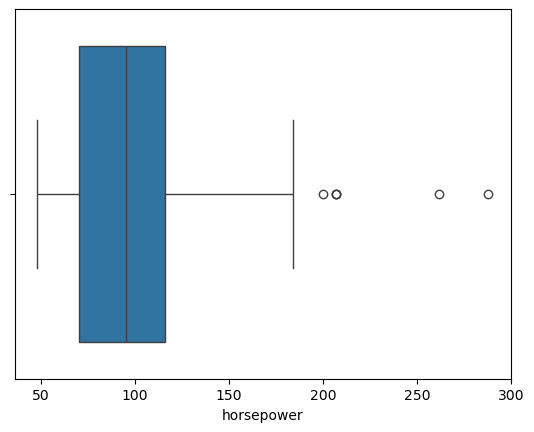

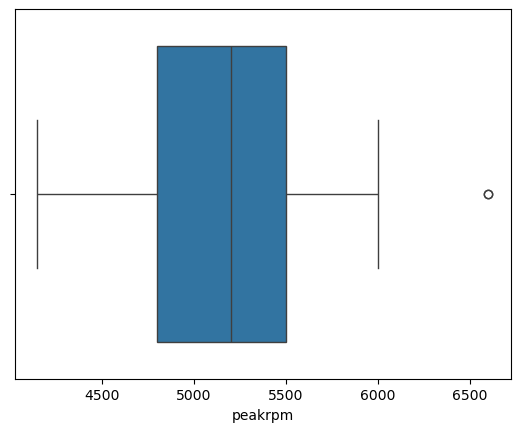

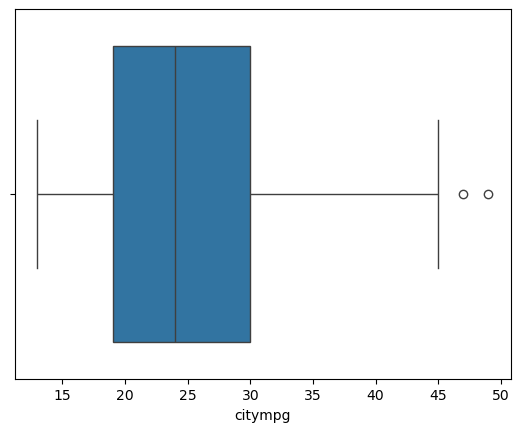

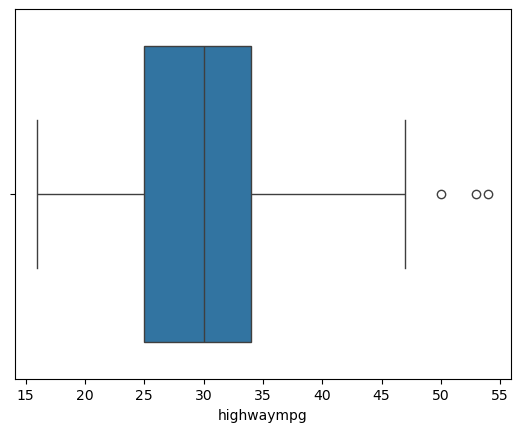

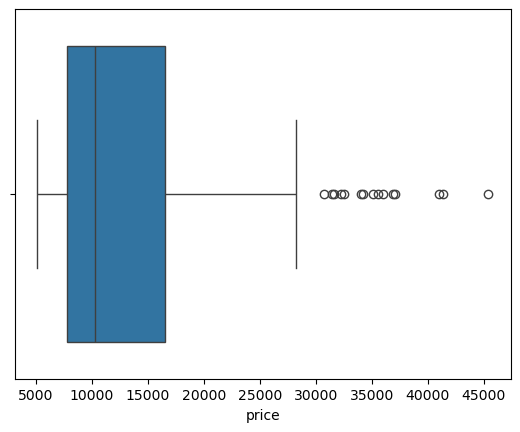

In [18]:
#loop designed to generate boxplots for each numerical column in a DataFrame
for i in numerical_features:
    sns.boxplot(data = df, x= i)
    plt.show()

In [19]:
# Remove Outliers using IQR method
def outliers(df):
    for i in numerical_features:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        #capping
        df[i] = df[i].apply(lambda x : lower if x < lower else upper if x > upper else x)
    return(df)

In [20]:
df1 = outliers(df)

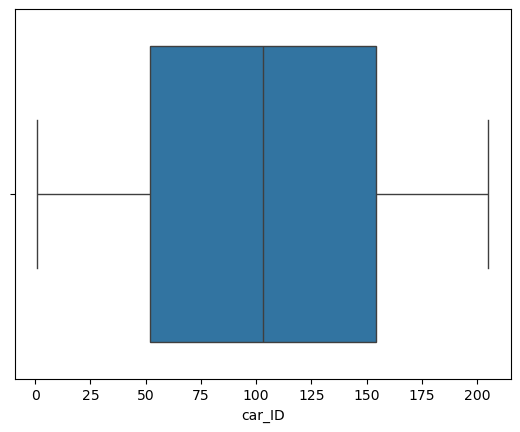

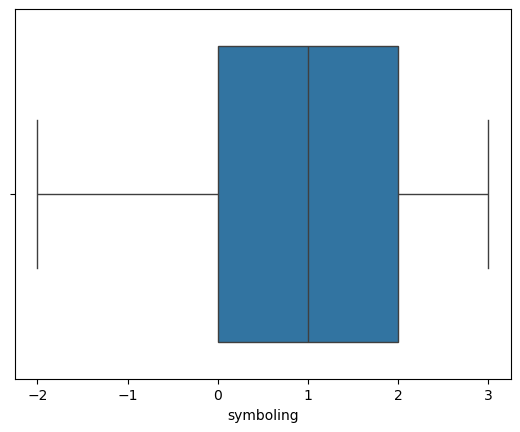

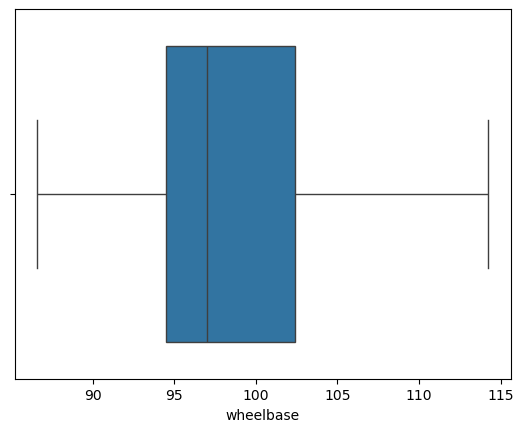

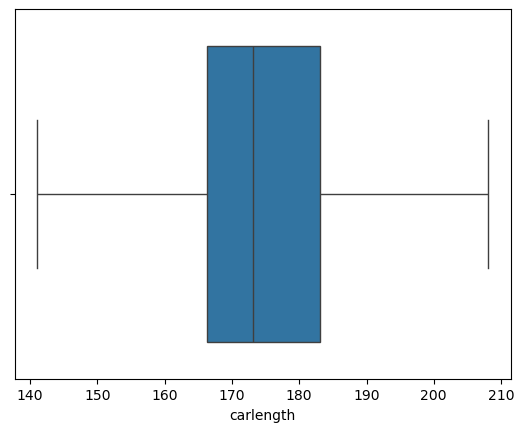

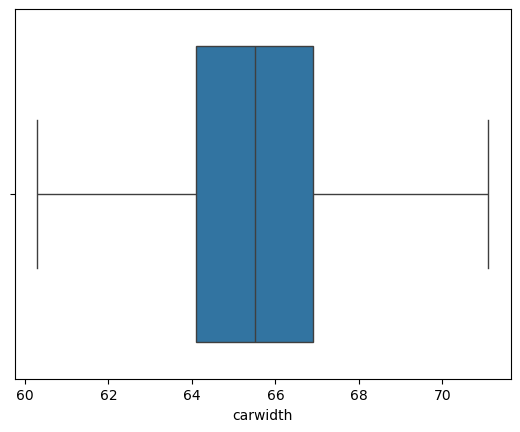

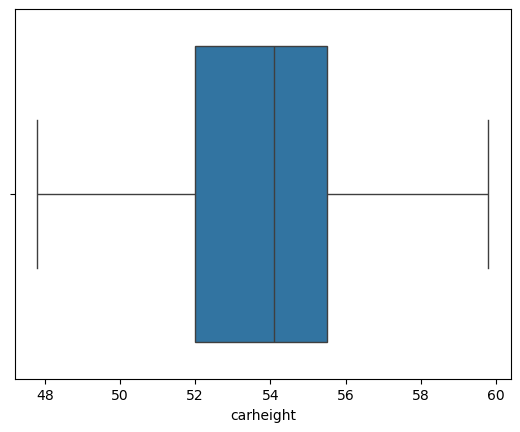

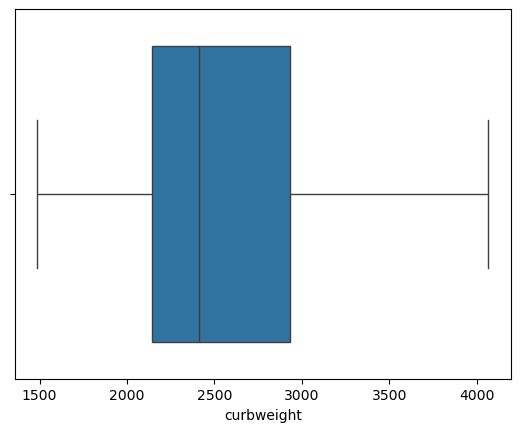

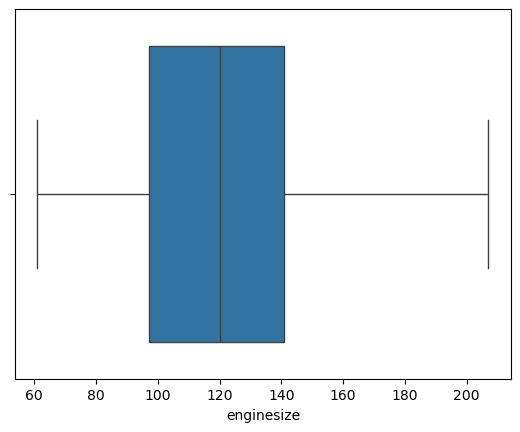

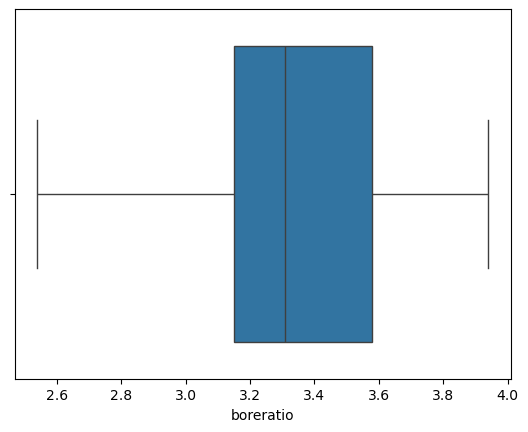

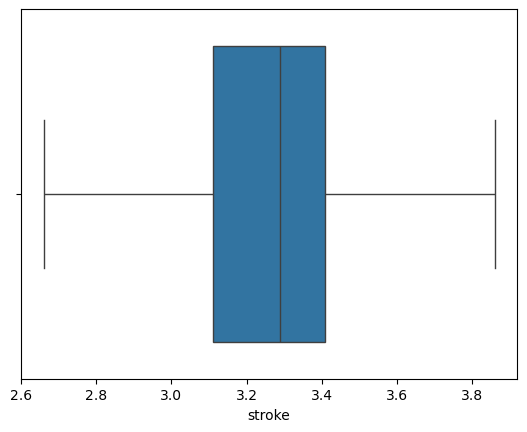

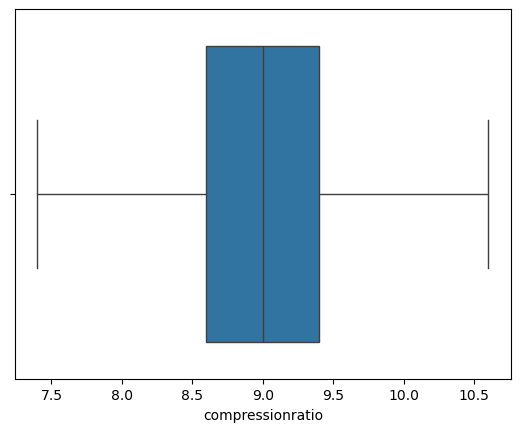

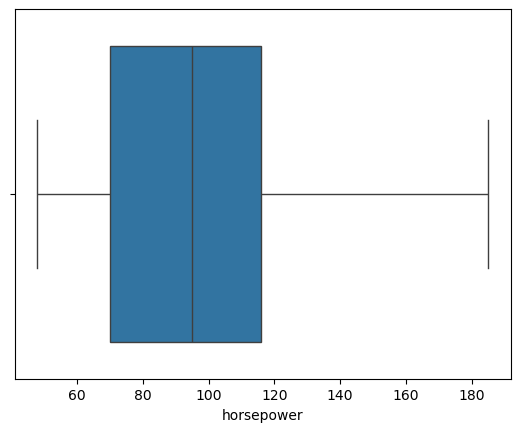

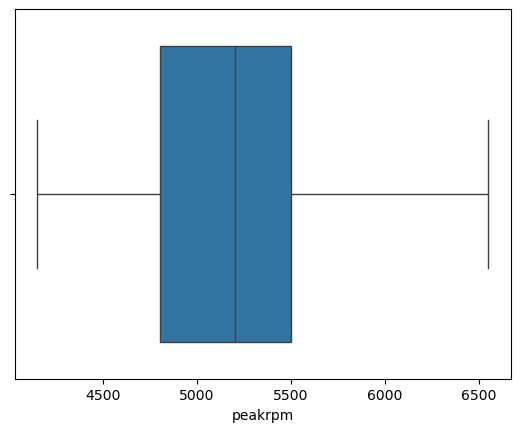

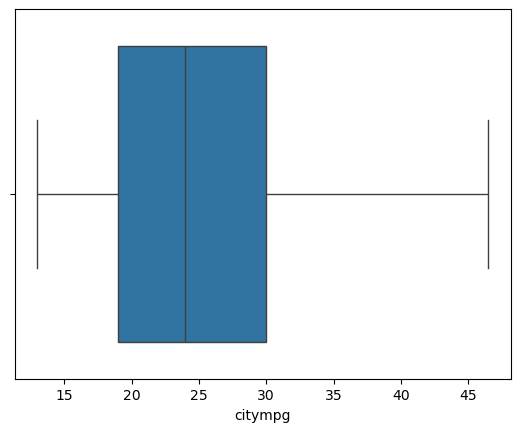

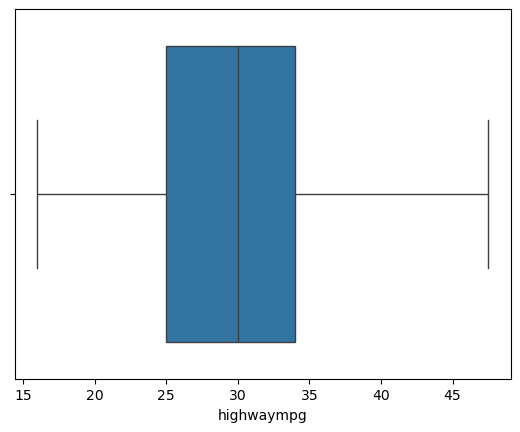

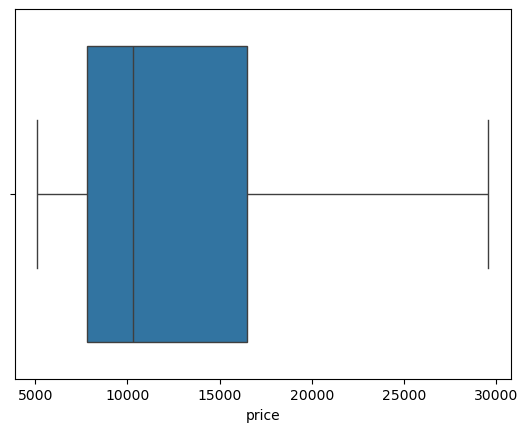

In [21]:
#loop designed to generate boxplots for each numerical column in a DataFrame after removing outliers
for i in numerical_features:
    sns.boxplot(data = df1, x= i)
    plt.show()

### Encoding Categorical Data

In [23]:
# Encoding
# Label encoding for carbody
le = LabelEncoder()
df1['carbody_Encoded'] = le.fit_transform(df1['carbody'])
#Print head after applying label encoder
print(df1.head())
# Print unique values in carbody_Encoded column
print("unique values in carbody_Encoded column",df1['carbody_Encoded'].unique())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \

In [24]:
#onehot encoding for gas type
onehot = OneHotEncoder(sparse_output = False)
fuel = onehot.fit_transform(df1[['fueltype']])
fuel_columns = onehot.get_feature_names_out(['fueltype'])

#creaate new dataframe with onehot encoded columns
df_onehot = pd.concat([df1,pd.DataFrame(fuel,columns = fuel_columns)],axis = 1)
df_onehot.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_Encoded,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,0,0.0,1.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,0,0.0,1.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,2,0.0,1.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,3,0.0,1.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,3,0.0,1.0


### Finding and Handling Skewness

In [26]:
df1[numerical_features].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64

In [27]:
# Apply transformation to remove skewness
pt = PowerTransformer(method = 'yeo-johnson')
# to save skewness removed numerical features
df1[numerical_features] = pt.fit_transform(df1[numerical_features])
# Print skewness after applying transformation
df1[numerical_features].skew()

car_ID             -0.268636
symboling          -0.064508
wheelbase           0.003159
carlength          -0.000424
carwidth            0.000000
carheight          -0.002653
curbweight          0.024871
enginesize          0.021314
boreratio          -0.011526
stroke              0.011287
compressionratio    0.001809
horsepower          0.044124
peakrpm            -0.002338
citympg             0.000325
highwaympg         -0.006936
price               0.081616
dtype: float64

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.168789   0.174528   0.171698  0.102707   
symboling        -0.168789   1.000000  -0.561041  -0.373738 -0.244950   
wheelbase         0.174528  -0.561041   1.000000   0.864441  0.770991   
carlength         0.171698  -0.373738   0.864441   1.000000  0.852265   
carwidth          0.102707  -0.244950   0.770991   0.852265  1.000000   
carheight         0.249374  -0.542977   0.601500   0.484915  0.273349   
curbweight        0.122208  -0.235214   0.735608   0.891362  0.864943   
enginesize        0.071438  -0.164886   0.557667   0.739176  0.749602   
boreratio         0.267838  -0.157331   0.473830   0.610873  0.582289   
stroke           -0.145482   0.008447   0.204289   0.161858  0.228472   
compressionratio  0.158270  -0.064772  -0.007564  -0.067316 -0.055679   
horsepower       -0.018831   0.005957   0.433433   0.646672  0.688921   
peakrpm          -0.214406   0.272725  -0.352138  -

<Axes: title={'center': 'Correlation between numerical features'}>

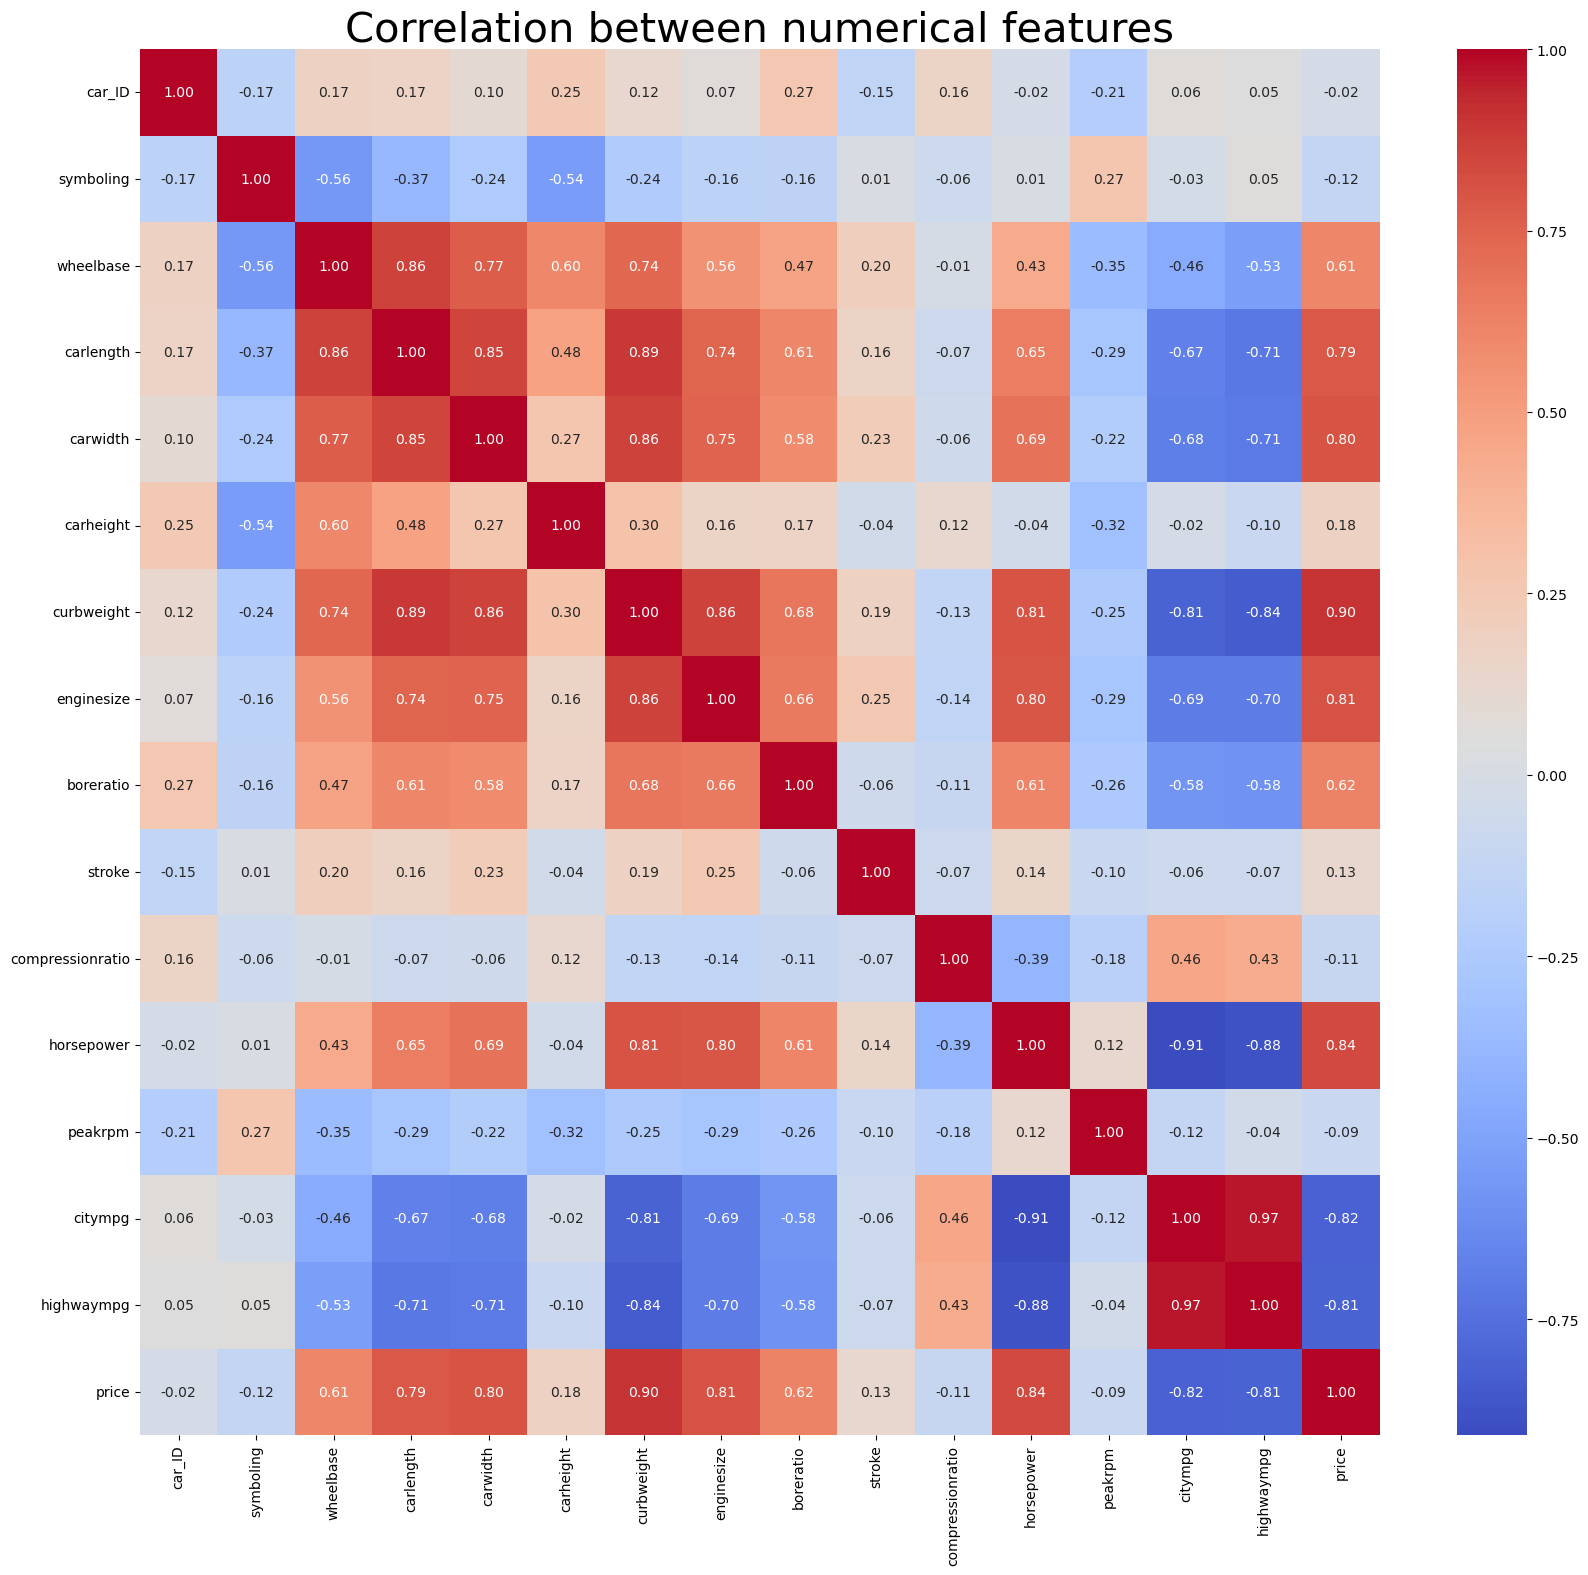

In [28]:
# to show correlation
df2 = df1[numerical_features]
correlation = df2.corr()
print(correlation)
# to plot heatmap to show correlation graphically
plt.figure(figsize=(20,18))
plt.title("Correlation between numerical features",fontsize = 30)
sns.heatmap(correlation,annot = True,fmt ='.2f',cmap ='coolwarm')

### Feature Selection

In [30]:
# Feature selection
#SelectKBest
x = df2.drop("price",axis = 1)
y = df2["price"]
sk = SelectKBest(score_func = f_regression,k = 10)
x_selected = sk.fit_transform(x,y)
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature' : x.columns , 'Score': sk.scores_}).sort_values('Score',ascending = False)
print("Selected Features", selected_features)
print("\n Selected Features with scores")
print(feature_scores)

Selected Features Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')

 Selected Features with scores
             Feature       Score
6         curbweight  907.059525
11        horsepower  495.002063
13           citympg  412.239957
7         enginesize  383.508860
14        highwaympg  382.900254
4           carwidth  370.267877
3          carlength  335.961288
8          boreratio  127.003580
2          wheelbase  117.533665
5          carheight    6.959996
9             stroke    3.283776
1          symboling    3.089960
10  compressionratio    2.285581
12           peakrpm    1.672592
0             car_ID    0.050186


### Feture Scaling

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_selected)

### Splitting the dataset

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state =42)

### Regression Algorithm Implementation

#### 1) Linear Regression

In [37]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [38]:
#prediction
y_pred1 = model1.predict(x_test)

#Model evaluation in Regression : MAE,MSE,RMSE,R2Score
#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
rmse = np.sqrt(mean_squared_error(y_test,y_pred1))
r2 = r2_score(y_test,y_pred1)
print("Evaluation metrics of Linear Regression")
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

Evaluation metrics of Linear Regression
mae : 0.29874830899989974
mse : 0.15045752636010765
rmse : 0.38788854889015173
r2 : 0.8456426658422701


#### 2) Decision Tree Regressor

In [40]:
model2 = DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
y_pred2 = model2.predict(x_test)
#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred2))
r2 = r2_score(y_test,y_pred2)
print("Evaluation metrics of Decision Tree Regressor")
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

Evaluation metrics of Decision Tree Regressor
mae : 0.20462607003925193
mse : 0.06425710647111375
rmse : 0.2534898547696017
r2 : 0.9340773712321224


#### 3) Random Forest Regressor

In [43]:
model3 = RandomForestRegressor()
model3.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
y_pred3 = model3.predict(x_test)
#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred3)
mse = mean_squared_error(y_test,y_pred3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred3))
r2 = r2_score(y_test,y_pred3)
print("Evaluation metrics of Random Forest Regressor")
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

Evaluation metrics of Random Forest Regressor
mae : 0.1912986293620078
mse : 0.05895359417811086
rmse : 0.24280361236627196
r2 : 0.9395183487559807


#### 4) Gradient Boosting Regressor

In [46]:
model4 = GradientBoostingRegressor()
model4.fit(x_train,y_train)

GradientBoostingRegressor()

In [47]:
y_pred4 = model4.predict(x_test)
#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred4)
mse = mean_squared_error(y_test,y_pred4)
rmse = np.sqrt(mean_squared_error(y_test,y_pred4))
r2 = r2_score(y_test,y_pred4)
print("Evaluation metrics of GradientBoostingRegressor")
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

Evaluation metrics of GradientBoostingRegressor
mae : 0.207215386585363
mse : 0.06676044420071758
rmse : 0.2583804253435573
r2 : 0.9315091478418662


#### 5) Support Vector Regressor

In [49]:
model5 = SVR()
model5.fit(x_train,y_train)

SVR()

In [50]:
y_pred5 = model5.predict(x_test)
#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred5)
mse = mean_squared_error(y_test,y_pred5)
rmse = np.sqrt(mean_squared_error(y_test,y_pred5))
r2 = r2_score(y_test,y_pred5)
print("Evaluation metrics of Support Vector Regressor")
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

Evaluation metrics of Support Vector Regressor
mae : 0.35022389150708655
mse : 0.2420471481609338
rmse : 0.49198287384921624
r2 : 0.7516790722640184


### Model Evaluation and Comparison 
##### Evaluation Metrics:

* Mean Squared Error (MSE): Measures average squared difference between actual and predicted values.
* Mean Absolute Error (MAE): Measures average absolute difference between actual and predicted values.
* R-squared Score (R²): Explains the proportion of variance captured by the model.
* Root Mean Squared Error (MSE) : Provides a measure of error similar to MSE but in the same unit as the target variable.

##### Compare Models:
* Evaluate all models using the metrics above.
* Identify the best-performing and worst-performing models based on the metrics.

In [52]:
models = {
    '1) Linear Regression' : LinearRegression(),
    '2) Decision Tree Regressor' : DecisionTreeRegressor(),
    '3) Random Forest Regressor' : RandomForestRegressor(),
    '4) Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5) Support Vector Regressor' : SVR()
}

In [53]:
results = {}
for model_name,model in models.items():
    # fit the model
    model.fit(x_train,y_train)
    #Predict the result
    y_pred = model.predict(x_test)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    #store results
    results[model_name] = {"MSE" : mse, "MAE": mae, "RMSE": rmse,"R2Score" : r2 }

In [54]:
results_df = pd.DataFrame(results).T
print(results_df)

                                     MSE       MAE      RMSE   R2Score
1) Linear Regression            0.150458  0.298748  0.387889  0.845643
2) Decision Tree Regressor      0.065604  0.204639  0.256133  0.932695
3) Random Forest Regressor      0.062262  0.199379  0.249523  0.936125
4) Gradient Boosting Regressor  0.068538  0.209734  0.261798  0.929685
5) Support Vector Regressor     0.242047  0.350224  0.491983  0.751679


#### Comparison of Models:
* All regression models (Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regressor) are evaluated using the above metrics. The results for each model are compared to identify:

#### 1.Best-Performing Model:
* The model with the lowest MSE, MAE, and RMSE, and the highest R² score, indicating high accuracy and robustness in predictions.

#### 2.Worst-Performing Model:
* The model with the highest MSE, MAE, and RMSE, and the lowest R² score, suggesting poor performance and a weak ability to capture the variance in the dataset.


In [56]:
best_model = results_df.sort_values(by = 'R2Score',ascending = False).iloc[0]
print("Best model is \n",best_model.name)

Best model is 
 3) Random Forest Regressor


In [57]:
worst_model = results_df.sort_values(by = 'R2Score', ascending = True).iloc[0]
print("Worst model is\n",worst_model.name)

Worst model is
 5) Support Vector Regressor


#### Hyperparameter Tuning

In [59]:

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    
    'n_estimators': [200, 500, 700],  
    'max_depth': [10, 20, 30],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt']
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model with optimized hyperparameters
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on test data
y_pred = best_rf.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print new model performance
print(f"\n🔹 After Hyperparameter Tuning:")
print(f"MSE: {mse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"R² Score: {r2:.5f}")


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

🔹 After Hyperparameter Tuning:
MSE: 0.06033
MAE: 0.20063
RMSE: 0.24561
R² Score: 0.93811
